In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

%store -r data
data

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.520000,2.89,112.83
1,1,171.46,103.36,103.66,3.770000,2.99,113.09
2,1,172.69,104.48,103.50,4.400000,2.94,113.16
3,1,171.36,103.91,103.94,3.620000,3.01,113.51
4,1,171.73,104.28,103.46,4.040000,3.48,112.54
...,...,...,...,...,...,...,...
1303,0,172.17,104.49,103.76,5.302069,2.93,111.21
1315,0,172.08,104.15,104.17,5.200358,3.40,112.29
1347,0,171.72,104.46,104.12,5.175468,3.61,110.31
1435,0,172.66,104.33,104.41,5.173450,3.56,111.47


In [11]:
# regression logistique

att = data.columns[1:].drop("margin_low")

char = "margin_low~"
for attr in att:
    char += "+" + attr
    
print("char =", char, "\n") 

reg_log = smf.glm(char, data=data, family=sm.families.Binomial()).fit()
print(reg_log.summary())

char = margin_low~+diagonal+height_left+height_right+margin_up+length 

                 Generalized Linear Model Regression Results                  
Dep. Variable:             margin_low   No. Observations:                 1495
Model:                            GLM   Df Residuals:                     1489
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Wed, 21 Sep 2022   Deviance:                   3.9529e+05
Time:                        17:28:25   Pearson chi2:                 8.45e+19
No. Iterations:                     2   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1014: RuntimeWarning: invalid value encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1015: RuntimeWarning: invalid value encountered in log
  n * np.log(1 - mu + 1e-20)) * var_weights


In [10]:
# test de la regression 

x = data.iloc[:, 1:]
y = data.is_genuine

x_train, x_test, y_train, y_test = train_test_split(
x, y, test_size=0.33, random_state=5, stratify=y)

model = LogisticRegression()
model.fit(x_train, y_train)

x_test_scaled = x_test#scaler.transform(x_test)
y_pred = model.predict(x_test_scaled)

yhat = model.predict(x_test)
prediction = list(map(round, yhat))

In [4]:
from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)

cm = confusion_matrix(y_test, prediction) 
print ("Confusion Matrix : \n", cm) 
print('Test accuracy = ', accuracy_score(y_test, prediction))

Confusion Matrix : 
 [[162   2]
 [  0 330]]
Test accuracy =  0.9959514170040485


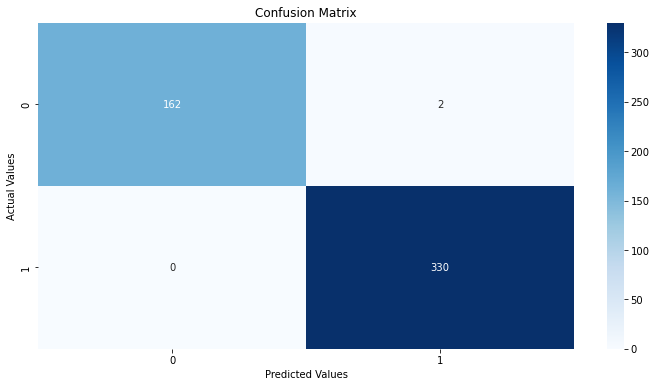

In [5]:
def plot_confusion_matrice():
    cm=confusion_matrix(y_test,prediction)
    plt.figure(figsize=(12,6))
    plt.title("Confusion Matrix")
    sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    # plt.savefig('confusion_matrix.png')
plot_confusion_matrice()

In [6]:
print("Sensibility test =", 330/335)
print("Specificity test =", 160/165)

Sensibility test = 0.9850746268656716
Specificity test = 0.9696969696969697


In [7]:
from sklearn.metrics import adjusted_rand_score

# ARI à comparer avec celui du Kmeans

ari = adjusted_rand_score(data["is_genuine"], model.predict(data.iloc[:, 1:]))
print("ARI =", ari)

ARI = 0.9650280369117059


In [8]:
%store model

Stored 'model' (LogisticRegression)
